In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sir_spreading import SIR_classical
from sir_spreading import SIR_threshold
from sir_spreading import SIR_cascade

from visualise_spreading import get_starting_nodes
from visualise_spreading import get_spreading_data
from visualise_spreading import visualise_spreading

import warnings
warnings.filterwarnings('ignore')

In [2]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [3]:
# Define metrics
metrics = ['random', 'degree'] #['random', 'degree', 'closeness', 'betweenness', 'eigenvector', 'harmonic']

# Get starting nodes
starting_nodes = {f'{metric}': get_starting_nodes(G, metric, 1) for metric in metrics}

In [4]:
# Classical reinforcement
beta = 0.3
gamma = 3
trigger = 'classical'

data_classical = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

# Threshold model
beta = 0.8 # Probability of being infected when we reach kappa threshold
gamma = 3 # Round of being infectious before being moved to recovered
kappa = 3 # Number of neighbors that make you in risk of being infected
trigger = 'threshold'

data_threshold = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics, kappa)

# Cascade model
beta = 0.05 # Fraction of neighbors
gamma = 3 # Rounds of 
trigger = 'cascade'

data_cascade = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

### Simple contagination

In [45]:
# Define metrics
metrics = ['random']

# Get starting nodes
starting_nodes = {f'{metric}': get_starting_nodes(G, metric, 1) for metric in metrics}

# Simple contagination
beta = 0.3
gamma = 3
trigger = 'classical'

data_classical = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

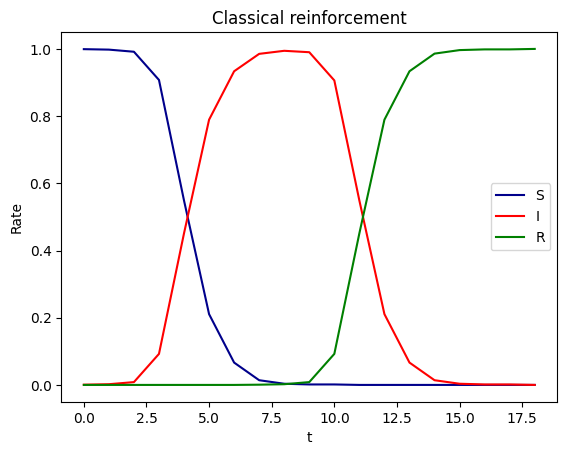

In [52]:
# Define plot
fig, ax = plt.subplots()

# Define color palette
custom_palette = ['darkblue', 'red', 'green']  # Add more colors if needed

# Classical
sns.lineplot(data=data_classical['random'], x='t', y='SR', label='S', color=custom_palette[0], ax=ax)
sns.lineplot(data=data_classical['random'], x='t', y='IR', label='I', color=custom_palette[1], ax=ax)
sns.lineplot(data=data_classical['random'], x='t', y='RR', label='R', color=custom_palette[2], ax=ax)

ax.set_title('Classical reinforcement');
plt.ylabel('Rate')

# Save fig
plt.savefig('ClassicalReinforcement')

### Parameter variation

#### Classical reinforcement

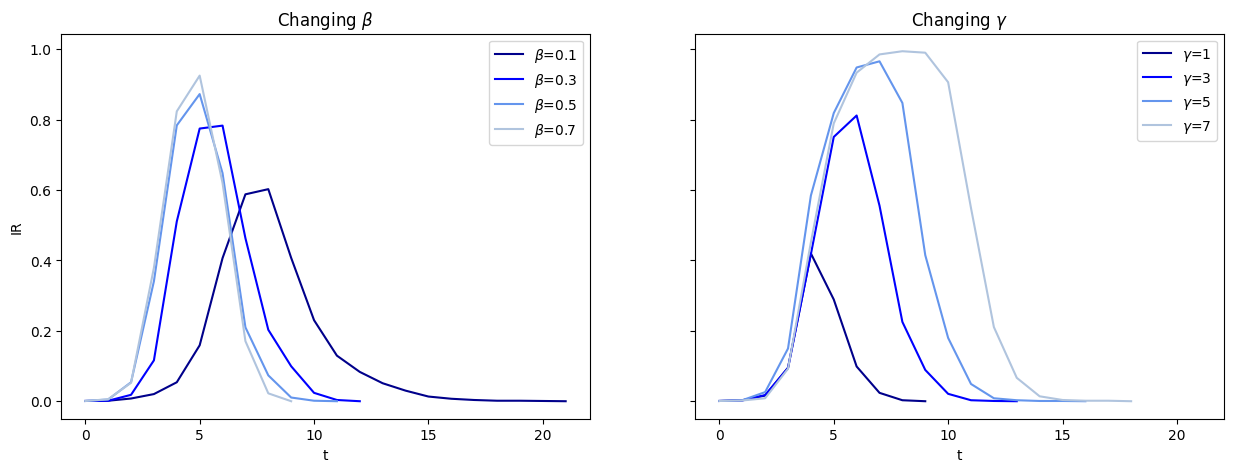

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True, sharey=True)

# Classical reinforcement
beta = [0.1,0.3,0.5,0.7]
gamma = [1, 3, 5, 7]
trigger = 'classical'

custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']

for i, b in enumerate(beta):
    data_classical = get_spreading_data(G, b, gamma[1], starting_nodes, trigger, metrics)
    sns.lineplot(data=data_classical['random'], x='t', y='IR', label=f'$\\beta$={b}', color=custom_palette[i], ax=ax[0])

for i, g in enumerate(gamma):
    data_classical = get_spreading_data(G, beta[1], g, starting_nodes, trigger, metrics)
    sns.lineplot(data=data_classical['random'], x='t', y='IR', label=f'$\gamma$={g}', color=custom_palette[i], ax=ax[1])

ax[0].set_title('Changing $\\beta$');
ax[1].set_title('Changing $\gamma$');

# Save fig
plt.savefig('ClassicalReinforcement_parameter_va')

#### Threshold model

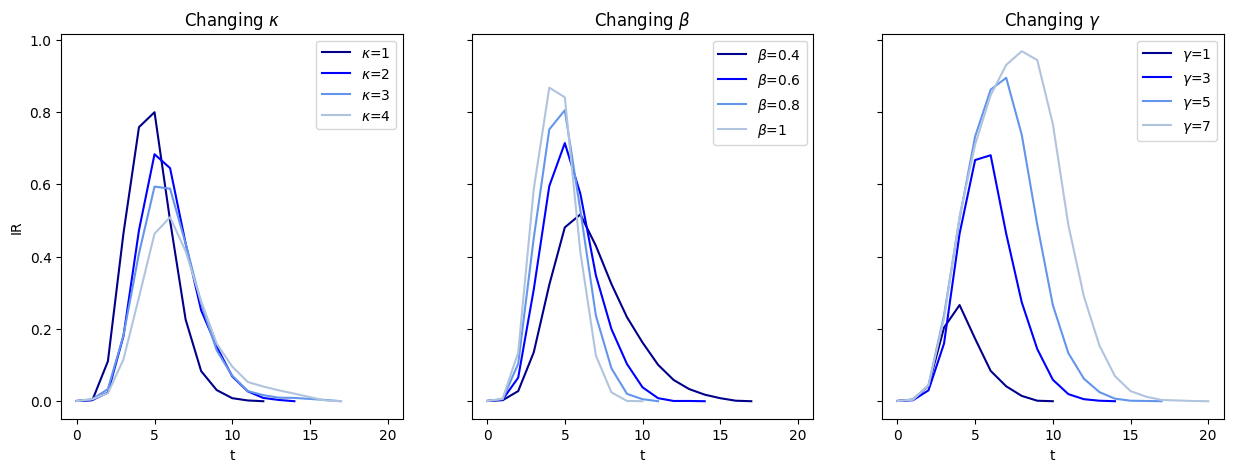

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

# Threshold model
kappa = [1, 2, 3, 4] # Threshold
beta = [0.4,0.6,0.8,1] # Probability to be infected
gamma = [1, 3, 5, 7] # Rounds
trigger = 'threshold'

custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']

for i, k in enumerate(kappa):
    data_threshold = get_spreading_data(G, beta[1], gamma[1], starting_nodes, trigger, metrics, k)
    sns.lineplot(data=data_threshold['random'], x='t', y='IR', label=f'$\kappa$={k}', color=custom_palette[i], ax=ax[0])

for i, b in enumerate(beta):
    data_threshold = get_spreading_data(G, b, gamma[1], starting_nodes, trigger, metrics, kappa[1])
    sns.lineplot(data=data_threshold['random'], x='t', y='IR', label=f'$\\beta$={b}', color=custom_palette[i], ax=ax[1])

for i, g in enumerate(gamma):
    data_threshold = get_spreading_data(G, beta[1], g, starting_nodes, trigger, metrics, kappa[1])
    sns.lineplot(data=data_threshold['random'], x='t', y='IR', label=f'$\gamma$={g}', color=custom_palette[i], ax=ax[2])

ax[0].set_title('Changing $\kappa$');
ax[1].set_title('Changing $\\beta$');
ax[2].set_title('Changing $\gamma$');

#### Cascade model

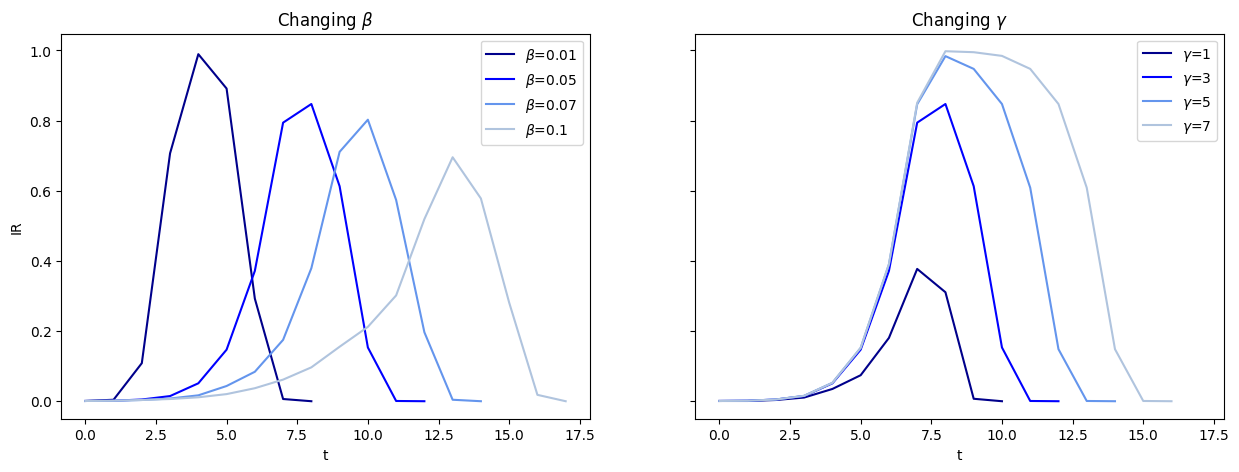

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True, sharey=True)

# Cascade model
beta = [0.01, 0.05, 0.07, 0.1]
gamma = [1, 3, 5, 7]
trigger = 'cascade'

custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']

for i, b in enumerate(beta):
    data_cascade = get_spreading_data(G, b, gamma[1], starting_nodes, trigger, metrics)
    sns.lineplot(data=data_cascade['random'], x='t', y='IR', label=f'$\\beta$={b}', color=custom_palette[i], ax=ax[0])

for i, g in enumerate(gamma):
    data_cascade = get_spreading_data(G, beta[1], g, starting_nodes, trigger, metrics)
    sns.lineplot(data=data_cascade['random'], x='t', y='IR', label=f'$\gamma$={g}', color=custom_palette[i], ax=ax[1])

ax[0].set_title('Changing $\\beta$');
ax[1].set_title('Changing $\gamma$');

### Targeted attack

#### 1 node

In [ ]:
# Define metrics
metrics = ['random', 'degree'] #['random', 'degree', 'closeness', 'betweenness', 'eigenvector', 'harmonic']

# Get starting nodes
starting_nodes = {f'{metric}': get_starting_nodes(G, metric, 1) for metric in metrics}

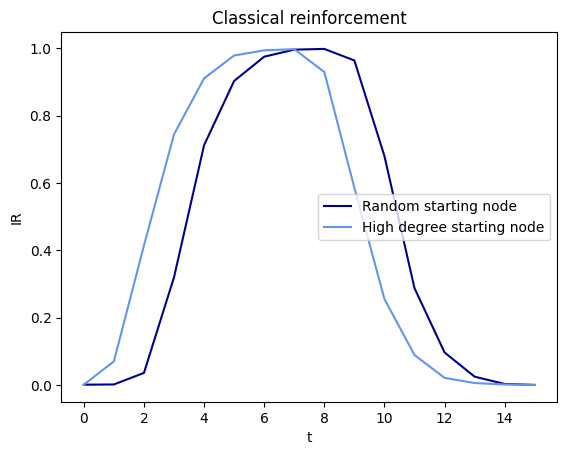

In [28]:
# Define plot
fig, ax = plt.subplots()

# Define color palette
custom_palette = ['darkblue', 'cornflowerblue']  # Add more colors if needed

# Classical
sns.lineplot(data=data_classical['random'], x='t', y='IR', label='Random starting node', color=custom_palette[0], ax=ax)
sns.lineplot(data=data_classical['degree'], x='t', y='IR', label='High degree starting node', color=custom_palette[1], ax=ax)

ax.set_title('Classical reinforcement');

#### 10 nodes

In [ ]:
# Define metrics
metrics = ['random', 'degree', 'closeness', 'betweenness'] #['random', 'degree', 'closeness', 'betweenness', 'eigenvector', 'harmonic']

# Get starting nodes
starting_nodes = {f'{metric}': get_starting_nodes(G, metric, 10) for metric in metrics}

In [38]:
# Classical reinforcement
beta = 0.3
gamma = 3
trigger = 'classical'

data_classical = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

# Threshold model
beta = 0.8 # Probability of being infected when we reach kappa threshold
gamma = 3 # Round of being infectious before being moved to recovered
kappa = 3 # Number of neighbors that make you in risk of being infected
trigger = 'threshold'

data_threshold = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics, kappa)

# Cascade model
beta = 0.05 # Fraction of neighbors
gamma = 3 # Rounds of 
trigger = 'cascade'

data_cascade = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

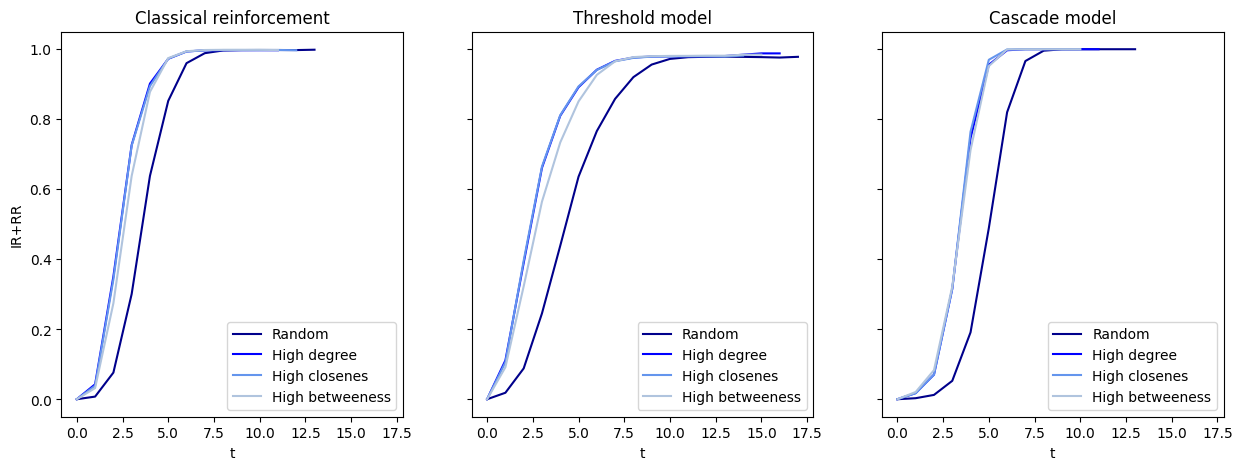

In [44]:
# Define plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Define color palette
custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']  # Add more colors if needed

# Classical
sns.lineplot(data=data_classical['random'], x='t', y='IR+RR', label='Random', color=custom_palette[0], ax=ax[0])
sns.lineplot(data=data_classical['degree'], x='t', y='IR+RR', label='High degree', color=custom_palette[1], ax=ax[0])
sns.lineplot(data=data_classical['closeness'], x='t', y='IR+RR', label='High closenes', color=custom_palette[2], ax=ax[0])
sns.lineplot(data=data_classical['betweenness'], x='t', y='IR+RR', label='High betweeness', color=custom_palette[3], ax=ax[0])


# Threshold
#sns.lineplot(data=data_threshold['random'], x='t', y='IR', label='Random starting node', color=custom_palette[0], ax=ax[1])
#sns.lineplot(data=data_threshold['degree'], x='t', y='IR', label='High degree starting node', color=custom_palette[1], ax=ax[1])
sns.lineplot(data=data_threshold['random'], x='t', y='IR+RR', label='Random', color=custom_palette[0], ax=ax[1])
sns.lineplot(data=data_threshold['degree'], x='t', y='IR+RR', label='High degree', color=custom_palette[1], ax=ax[1])
sns.lineplot(data=data_threshold['closeness'], x='t', y='IR+RR', label='High closenes', color=custom_palette[2], ax=ax[1])
sns.lineplot(data=data_threshold['betweenness'], x='t', y='IR+RR', label='High betweeness', color=custom_palette[3], ax=ax[1])

# Cascade
#sns.lineplot(data=data_cascade['random'], x='t', y='IR', label='Random starting node', color=custom_palette[0], ax=ax[2])
#sns.lineplot(data=data_cascade['degree'], x='t', y='IR', label='High degree starting node', color=custom_palette[1], ax=ax[2])
sns.lineplot(data=data_cascade['random'], x='t', y='IR+RR', label='Random', color=custom_palette[0], ax=ax[2])
sns.lineplot(data=data_cascade['degree'], x='t', y='IR+RR', label='High degree', color=custom_palette[1], ax=ax[2])
sns.lineplot(data=data_cascade['closeness'], x='t', y='IR+RR', label='High closenes', color=custom_palette[2], ax=ax[2])
sns.lineplot(data=data_cascade['betweenness'], x='t', y='IR+RR', label='High betweeness', color=custom_palette[3], ax=ax[2])

ax[0].set_title('Classical reinforcement');
ax[1].set_title('Threshold model');
ax[2].set_title('Cascade model');